In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt
import numpy as np
sns.set(style="darkgrid")

In [2]:
k=12
spainPop=47431256

In [3]:

dfSpain = pd.read_csv('UMD/Full Survey Data/country/esp_country_full_new.csv')


genders=dfSpain["gender"].unique()
buckets=dfSpain["age_bucket"].unique()
cumuls={g: {b: 0.5 for b in buckets} for g in genders}
cumuls_w={g: {b: 0.5 for b in buckets} for g in genders}

dfCumulSpain=pd.DataFrame(columns=['date','age_bucket','gender','pct_newcases','pct_cumul'])
for index, row in dfSpain.iterrows(): 
    date=row['date']
    age_bucket=row['age_bucket']
    gender=row['gender']
    delta=dt.timedelta(days=k/2)
    newdate=(dt.datetime.strptime(date,"%Y-%m-%d") -delta).strftime("%Y-%m-%d")
    pct_newcases_w=row['pct_cli_weighted']/k
    pct_newcases=row['pct_cli']/k
     
    cumuls[gender][age_bucket]=cumuls[gender][age_bucket]+pct_newcases
    cumuls_w[gender][age_bucket]=cumuls_w[gender][age_bucket]+pct_newcases_w
    
    newrow={'date': newdate,
            'age_bucket': age_bucket,
            'gender': gender,
            'pct_newcases': pct_newcases,
            'pct_cumul': cumuls[gender][age_bucket],
            'pct_newcases_w': pct_newcases,
            'pct_cumul_w': cumuls_w[gender][age_bucket],
            'cumulCases': 0,
            'cumulCases_w': 0
           }
    
    dfCumulSpain=dfCumulSpain.append(newrow, ignore_index=True)

dfSpain = pd.merge(dfSpain, dfCumulSpain, on=['date', 'age_bucket', 'gender'])    
dfSpain.to_csv("esp_country_full_new_cumul.csv")


In [4]:
spainAll=dfSpain.query("age_bucket=='overall' & gender=='overall'")
#spainAll.loc[:,'cumulCases']=0
#spainAll.loc[:,'cumulCases_w']=0

#print(type(spainAll['pct_cumul']))
spainAll.loc[:,'cumulCases']=np.round(spainAll["pct_cumul"]*spainPop/100).astype(int)
spainAll.loc[:,'cumulCases_w']=np.round(spainAll["pct_cumul_w"]*spainPop/100).astype(int)



/Users/frey/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


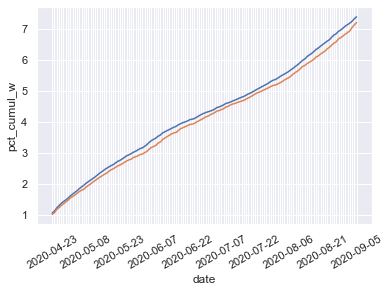

In [5]:
ax=sns.lineplot(data=spainAll, x="date", y="pct_cumul")
sns.lineplot(data=spainAll, ax=ax, x="date", y="pct_cumul_w")
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 15 == 0:  # every 10th label is kept
        label.set_visible(True)
        label.set_rotation(30)
    else:
        label.set_visible(False)

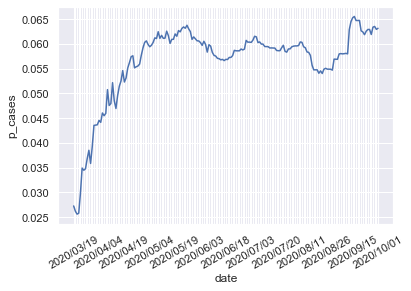

In [6]:
estimateW=pd.read_csv('estimate-w-cumulative.csv')
bx=sns.lineplot(data=estimateW, x="date", y="p_cases")
for ind, label in enumerate(bx.get_xticklabels()):
    if ind % 15 == 0:  # every 10th label is kept
        label.set_visible(True)
        label.set_rotation(30)
    else:
        label.set_visible(False)

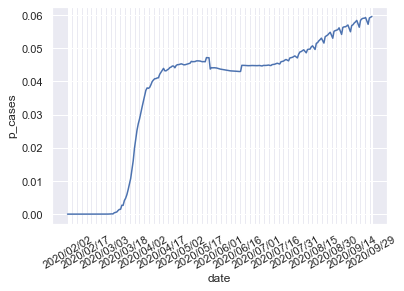

In [7]:
estimateCCFR=pd.read_csv('estimate-ccfr-cumulative.csv')
cx=sns.lineplot(data=estimateCCFR, x="date", y="p_cases")
for ind, label in enumerate(cx.get_xticklabels()):
    if ind % 15 == 0:  # every 10th label is kept
        label.set_visible(True)
        label.set_rotation(30)
    else:
        label.set_visible(False)

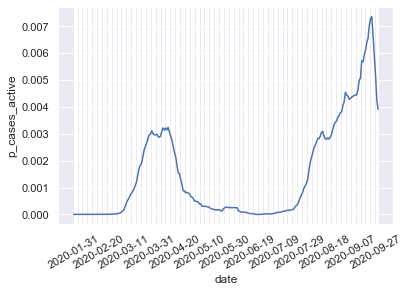

In [17]:
estimateActiveA=pd.read_csv('estimates-ccfr-based/spain/Asturias-estimate.csv')
ax=sns.lineplot(data=estimateActiveA, x="date", y="p_cases_active")
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 20 == 0:  # every 10th label is kept
        label.set_visible(True)
        label.set_rotation(30)
    else:
        label.set_visible(False)

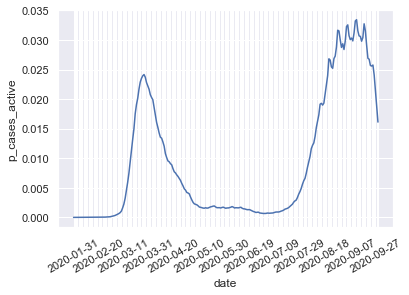

In [18]:
estimateActiveM=pd.read_csv('estimates-ccfr-based/spain/Madrid-estimate.csv')
mx=sns.lineplot(data=estimateActiveM, x="date", y="p_cases_active")
for ind, label in enumerate(mx.get_xticklabels()):
    if ind % 20 == 0:  # every 10th label is kept
        label.set_visible(True)
        label.set_rotation(30)
    else:
        label.set_visible(False)

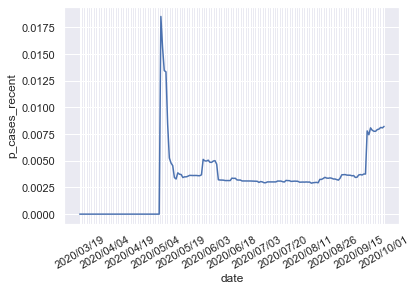

In [11]:
estimateW=pd.read_csv('estimate-w-cumulative.csv')
bx=sns.lineplot(data=estimateW, x="date", y="p_cases_recent")
for ind, label in enumerate(bx.get_xticklabels()):
    if ind % 15 == 0:  # every 10th label is kept
        label.set_visible(True)
        label.set_rotation(30)
    else:
        label.set_visible(False)